<a href="https://colab.research.google.com/github/jacobpad/DSPT7_Unit_1_Sprint_1_Data_Wrangling_and_Storytelling/blob/master/module1/Assignment_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [2]:
"""
Poker Hand:
https://archive.ics.uci.edu/ml/datasets/Poker+Hand

Data:
https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
"""

# Set data URL
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'

# I'll need pandas for this
import pandas as pd

# Make df
df = pd.read_csv(data_url)
df.head(3)

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9


In [3]:
# Get column names
column_headers = [
                'Suit of card #1',
                'Rank of card #1',
                'Suit of card #2',
                'Rank of card #2',
                'Suit of card #3',
                'Rank of card #3',
                'Suit of card #4',
                'Rank of card #4',
                'Suit of card #5',
                'Rank of card #5',
                'Poker Hand'
                ]

# Attach column names
df = pd.read_csv(data_url, header=None, names=column_headers)

# Print shape view sample
print(f'The shape of this dataframe is: {df.shape}\n')
df.sample(3)

The shape of this dataframe is: (25010, 11)



,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
21455,3,10,3,13,2,13,2,1,3,1,2
3194,1,6,3,4,4,9,2,1,4,13,0
1190,4,1,2,5,2,6,4,10,2,11,0


In [4]:
# Check for NaN's
df.isnull().sum()

Suit of card #1    0
Rank of card #1    0
Suit of card #2    0
Rank of card #2    0
Suit of card #3    0
Rank of card #3    0
Suit of card #4    0
Rank of card #4    0
Suit of card #5    0
Rank of card #5    0
Poker Hand         0
dtype: int64

In [5]:
# There are no NaN's but if there were, I could bring replace them in a couple
#   different ways
"""
While reading in the df, if "?" were NaN, use
`df = pd.read_csv(data_url, header=None, names=column_headers, na_values='?')`

Or replace "?" with NaN's withing the dataframe
df = df.replace({'?':np.NaN}) # Remember to import numpy
"""

'\nWhile reading in the df, if "?" were NaN, use\n`df = pd.read_csv(data_url, header=None, names=column_headers, na_values=\'?\')`\n\nOr replace "?" with NaN\'s withing the dataframe\ndf = df.replace({\'?\':np.NaN}) # Remember to import numpy\n'

In [6]:
import numpy as np

# To get some nulls and try it, let's make all the 3's NaN's
df = df.replace({3:np.NaN})

# Check the nulls now
print(df.isnull().sum())

# See df
df.tail()

Suit of card #1    6250
Rank of card #1    1882
Suit of card #2    6157
Rank of card #2    1912
Suit of card #3    6153
Rank of card #3    1965
Suit of card #4    6314
Rank of card #4    1999
Suit of card #5    6314
Rank of card #5    1914
Poker Hand          513
dtype: int64


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
25005,NaN,9.0,2.0,6.0,4.0,11.0,4.0,12.0,2.0,4.0,0.0
25006,4.0,1.0,4.0,10.0,NaN,13.0,NaN,4.0,1.0,10.0,1.0
25007,2.0,1.0,2.0,10.0,4.0,4.0,4.0,1.0,4.0,13.0,1.0
25008,2.0,12.0,4.0,NaN,1.0,10.0,1.0,12.0,4.0,9.0,1.0
25009,1.0,7.0,NaN,11.0,NaN,NaN,4.0,8.0,NaN,7.0,1.0


In [7]:
# Change the NaN's back to 3's
df = df.replace({np.NaN:3})

# Check the nulls now
print(df.isnull().sum())

Suit of card #1    0
Rank of card #1    0
Suit of card #2    0
Rank of card #2    0
Suit of card #3    0
Rank of card #3    0
Suit of card #4    0
Rank of card #4    0
Suit of card #5    0
Rank of card #5    0
Poker Hand         0
dtype: int64


In [8]:
# Use `.describe()`
df.describe()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [10]:
"""
Bank Data Set
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Data (zip file)
https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
"""

"""
DOING THIS WILL LOAD IT INTO THE LOCAL STORAGE OF COLAB
"""

# Load the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

# Unzip the data.zip file returned from the load in the cell above
!unzip bank.zip

--2020-05-07 04:24:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip’

bank.zip            100%[===================>] 565.47K  1.65MB/s    in 0.3s    

2020-05-07 04:24:28 (1.65 MB/s) - ‘bank.zip’ saved [579043/579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [11]:
# Read in and view
df = pd.read_csv('bank.csv')
df.head(2)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."


In [12]:
# Wait!!! Things look aweful. Let's fix it.
# Use delimiter - seperate things by the ";"
df = pd.read_csv('bank.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
# View tail
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [14]:
# View sample
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1570,34,management,married,tertiary,no,176,no,no,cellular,18,aug,61,4,-1,0,unknown,no
354,29,management,married,tertiary,no,318,yes,no,cellular,18,may,1434,2,356,4,failure,no
347,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success,yes
1111,37,technician,married,secondary,no,480,no,no,cellular,22,oct,344,2,182,8,other,yes
2999,40,management,married,tertiary,no,294,yes,no,cellular,23,jul,97,5,-1,0,unknown,no


In [15]:
# Any nulls?
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [16]:
# Describe
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [17]:
# Describe again
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Your Code Here

In [19]:
# This shows the numbers of people with their education and marital status
edu_mar = pd.crosstab(df['education'], df['marital'])
edu_mar

marital,divorced,married,single
education,,,
primary,79,526,73
secondary,270,1427,609
tertiary,155,727,468
unknown,24,117,46


In [20]:
# I can also show the percentages by normalizing
# Same data, normalized
pd.crosstab(df['education'], df['marital'], normalize='index')

marital,divorced,married,single
education,,,
primary,0.116519,0.775811,0.107670
secondary,0.117086,0.618820,0.264094
tertiary,0.114815,0.538519,0.346667
unknown,0.128342,0.625668,0.245989


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

In [0]:
# Your Code Here

In [22]:
# See types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

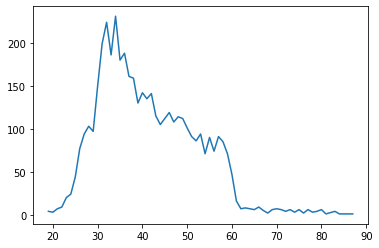

In [23]:
import matplotlib.pyplot as plt

# Line plot

df['age'].value_counts().sort_index().plot();

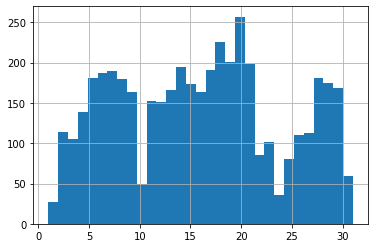

In [24]:
# Histogram
df['day'].hist(bins=31);

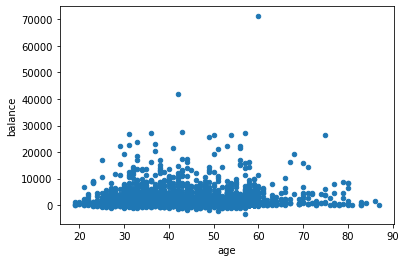

In [25]:
# Scatter plot
df.plot.scatter('age', 'balance');

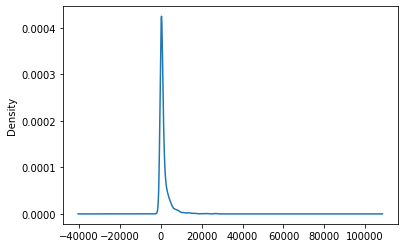

In [26]:
# Density Plot - Kernel Density Estimate (KDE)
df['balance'].plot.density()

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# Your Code Here

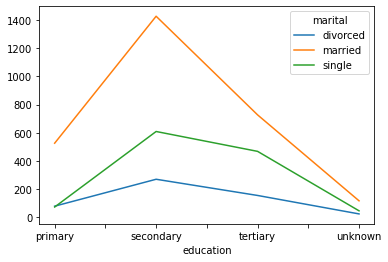

In [28]:
# Plotting using Crosstabs
# Using the edu_mar variable made above
edu_mar.plot();

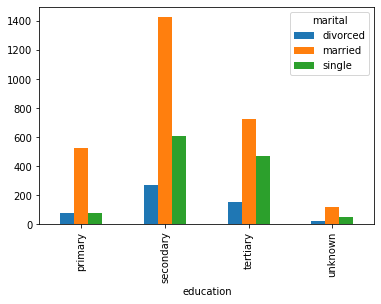

In [29]:
# More crosstab plot
edu_mar.plot(kind='bar');

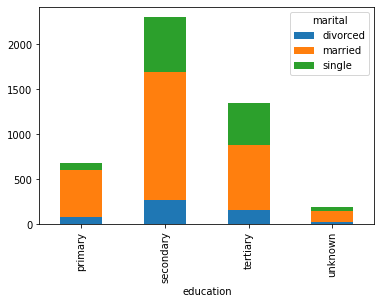

In [30]:
# Same as above but stacked
edu_mar.plot(kind='bar', stacked=True);

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


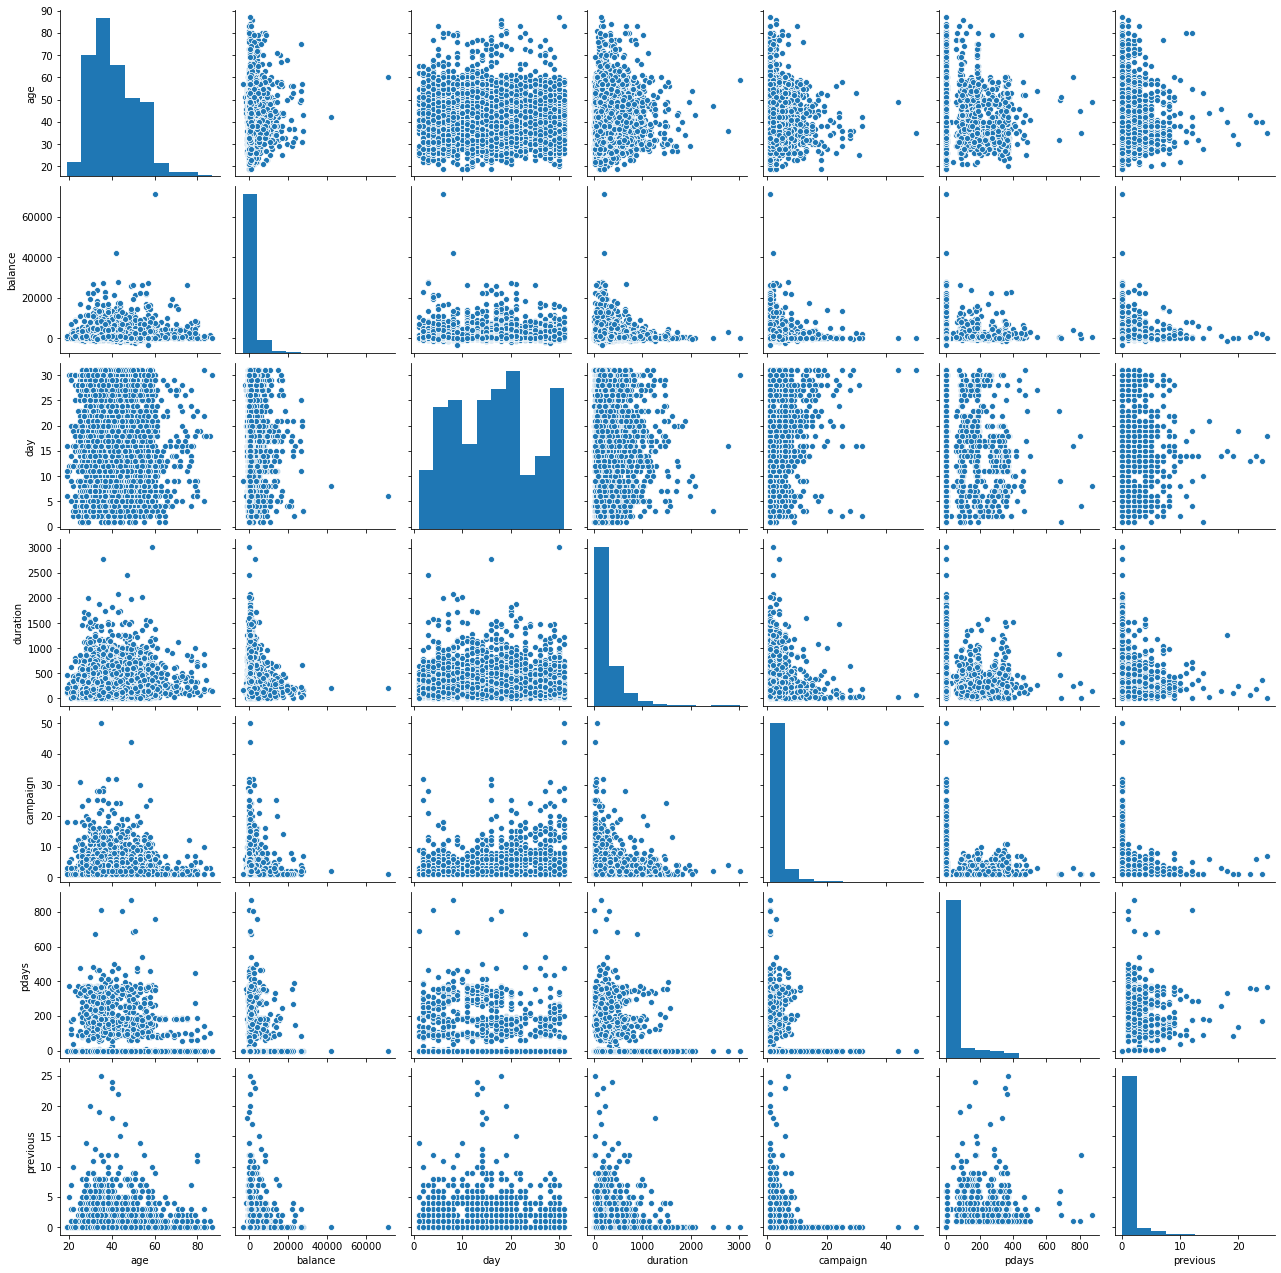

In [31]:
import seaborn as sns
sns.pairplot(df);

In [32]:
# bins with pd.cut()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [33]:
# Bin on day - This is feature engineering
# https://www.youtube.com/watch?v=06LZtiF5yGg
df['day_group'] = pd.cut(df['day'], 
                         bins=[1,10,20,31], 
                         labels=['1-10', '11-20', '21-31'])
crosstab_days = df[['day', 'day_group']]
crosstab_days

,day,day_group
0,19,11-20
1,11,11-20
2,16,11-20
3,3,1-10
4,5,1-10
...,...,...
4516,30,21-31
4517,9,1-10
4518,19,11-20
4519,6,1-10


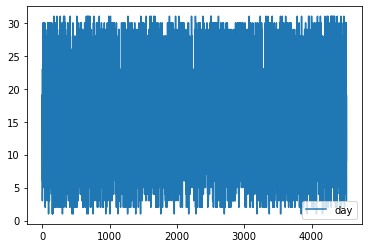

In [34]:
# Clearly it isn't great, but it does the job
# Plot the binned crosstab
crosstab_days.plot();